# **Trabalhando com planilhas do Excel**


In [1]:
# Importando Pandas
import pandas as pd

In [2]:
# Leitura de arquivo
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [4]:
# juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
# Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
# Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
# Pegando uma amostragem
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
93,Aracaju,2018-01-01,188.70,1523,1
47,Aracaju,2018-01-01,80.46,1520,2
189,Natal,2019-01-02,139.73,1037,2
96,Recife,2019-01-01,165.36,982,7
47,Fortaleza,2019-01-01,13.45,1004,5


In [10]:
# Exibindo o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
# Alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [12]:
# Exibindo o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


###**Tratando valors faltantes**

In [14]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
# Substituindo valores nulos de vendas pela sua média caso exista
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
# Substituindo valores nulos por 0 (zero) caso exista
df["Vendas"].fillna(0, inplace=True)

In [18]:
# Apagando linhas com valores nulos caso exista
df.dropna(inplace=True)

In [19]:
# Apagando linhas com valores nulos em uma determinada coluna
df.dropna(subset=["Vendas"],inplace=True)

In [21]:
# Removendo linhas que estejam valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

###**Criando novas colunas**


In [22]:
# Criando uma coluna chamada Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [25]:
# Retornando a menor receita
df["Receita"].min()


3.34

In [26]:
# Retornando as (n)maiores receitas nlargest
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [27]:
# Retornando as (n)menores receitas nlargest
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [28]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [29]:
# Ordenando o conjunto de dados em ordem crescente
df.sort_values("Receita",ascending=True).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Salvador,2019-01-01,4.57,1035,1,4.57
92,Natal,2019-01-02,4.57,1035,1,4.57
95,Salvador,2019-01-01,5.13,1035,1,5.13
95,Natal,2019-01-02,5.13,1035,1,5.13
161,Salvador,2019-01-02,5.80,1036,1,5.80
161,Natal,2019-01-02,5.80,1036,1,5.80
216,Natal,2019-01-02,5.82,1035,1,5.82
216,Salvador,2019-01-02,5.82,1035,1,5.82


In [30]:
# Ordenando o conjunto de dados em ordem decrescente
df.sort_values("Receita",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# **Trabalhando com Datas**

In [31]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [32]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [33]:
# Transformando a coluna data de inteiro para Data 
df["Data"] = pd.to_datetime(df["Data"])

In [35]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [36]:
# Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [37]:
# Criando uma nova coluna com o ano
df["AnoVenda"] = df["Data"].dt.year

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,AnoVenda
167,Natal,2019-01-02,36.42,1037,1,36.42,2019
132,Natal,2019-01-02,19.61,1036,2,39.22,2019
40,Aracaju,2018-01-01,6.99,1522,7,48.93,2018
38,Salvador,2019-01-01,165.34,1034,3,496.02,2019
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019


In [41]:
# Extraindo o mês e o dia
df["MesVenda"], df["DiaVenda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [43]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,AnoVenda,MesVenda,DiaVenda
188,Salvador,2019-01-02,178.11,1035,3,534.33,2019,1,2
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2
149,Salvador,2019-01-02,22.38,1034,3,67.14,2019,1,2
106,Aracaju,2018-01-01,16.32,1520,7,114.24,2018,1,1
97,Salvador,2019-01-01,39.91,1037,3,119.73,2019,1,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,2019,3,2


In [44]:
# Data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [45]:
# Data mais recente
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [46]:
# Calculando a diferença de dias
df["DiferencaDias"] = df["Data"] - df["Data"].min()

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,AnoVenda,MesVenda,DiaVenda,DiferencaDias
109,Aracaju,2018-01-01,51.64,1523,5,258.20,2018,1,1,0 days
35,Recife,2019-01-01,148.90,983,1,148.90,2019,1,1,365 days
67,Fortaleza,2019-01-01,43.51,1003,1,43.51,2019,1,1,365 days
79,Aracaju,2018-01-01,5.59,1521,4,22.36,2018,1,1,0 days
29,Fortaleza,2019-01-01,186.29,1005,2,372.58,2019,1,1,365 days


In [48]:
# Criando a coluna de trimestre
df["TrimestreVenda"] = df["Data"].dt.quarter

In [50]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,AnoVenda,MesVenda,DiaVenda,DiferencaDias,TrimestreVenda
149,Natal,2019-01-02,22.38,1034,3,67.14,2019,1,2,366 days,1
11,Fortaleza,2019-01-01,42.19,1003,3,126.57,2019,1,1,365 days,1
55,Salvador,2019-01-01,36.62,1036,1,36.62,2019,1,1,365 days,1
30,Salvador,2019-01-01,47.96,1034,2,95.92,2019,1,1,365 days,1
83,Aracaju,2018-01-01,14.44,1520,5,72.20,2018,1,1,0 days,1
61,Recife,2019-01-01,127.85,982,7,894.95,2019,1,1,365 days,1


In [52]:
# Filtrando ano 2019 e mês 3
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019)&(df["Data"].dt.month == 3)]

In [53]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,AnoVenda,MesVenda,DiaVenda,DiferencaDias,TrimestreVenda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


#**Visualização de Dados**

In [56]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

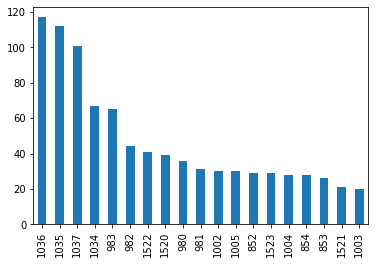

In [57]:
# Gráficos de Barras Verticais
df["LojaID"].value_counts(ascending=False).plot.bar()

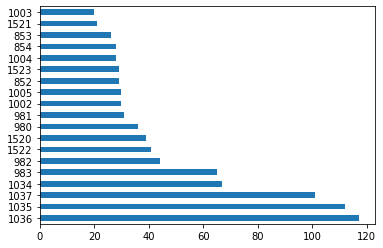

In [58]:
# Gráficos de Barras Horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

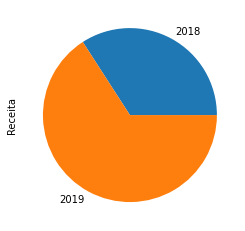

In [61]:
# Gráficos de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie(); # ponto e vírgula não mostra a linha com o texto <matplotlib...>

In [60]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

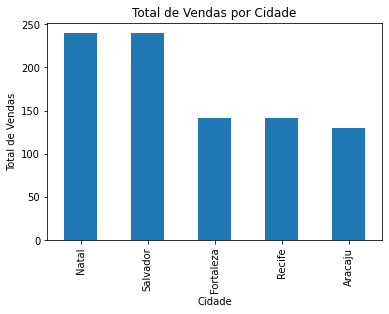

In [63]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade");
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Text(0, 0.5, 'Total de Vendas')

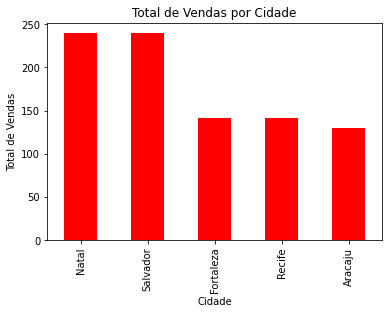

In [64]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="Red");
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [65]:
# Alterando o estilo
plt.style.use("ggplot")

Text(0, 0.5, 'Total de Vendas')

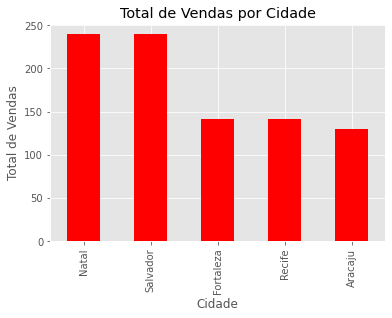

In [66]:
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="Red");
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [78]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["AnoVenda"] == 2019]

In [80]:
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,AnoVenda,MesVenda,DiaVenda,DiferencaDias,TrimestreVenda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


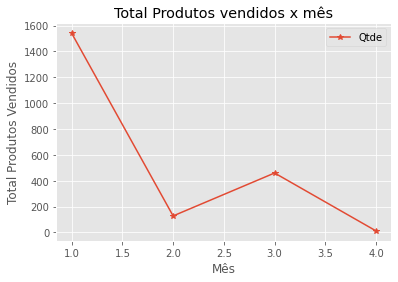

In [83]:
df_2019.groupby(df_2019["MesVenda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês", marker="*")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [71]:
df.groupby(df["MesVenda"])["Qtde"].sum()

MesVenda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

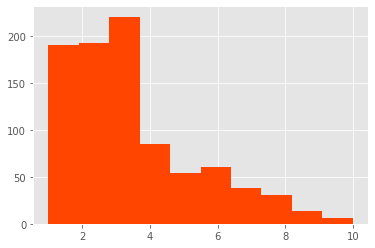

In [72]:
# Histograma
plt.hist(df["Qtde"], color="orangered");

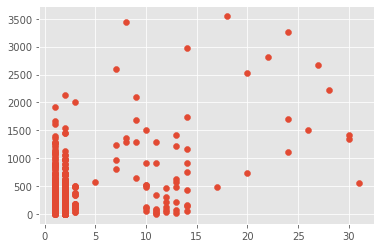

In [82]:
plt.scatter(x=df_2019["DiaVenda"], y = df_2019["Receita"]);

In [74]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,AnoVenda,MesVenda,DiaVenda,DiferencaDias,TrimestreVenda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1


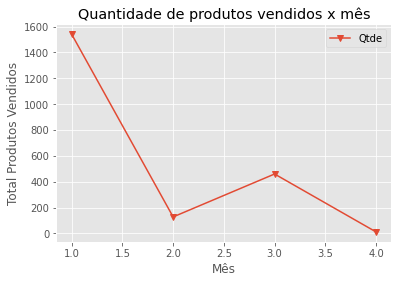

In [84]:
# Salvando o gráfico em png
df_2019.groupby(df_2019["MesVenda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")